In [6]:
import numpy as np
import uxarray as ux
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime

/glade/work/nforcone/conda-envs/Fall2024_ENV_NF/lib/python3.11/site-packages/uxarray/io/_esmf.py:89: RuntimeWarning: invalid value encountered in cast
  face_node_connectivity = in_ds["elementConn"].values.astype(INT_DTYPE)


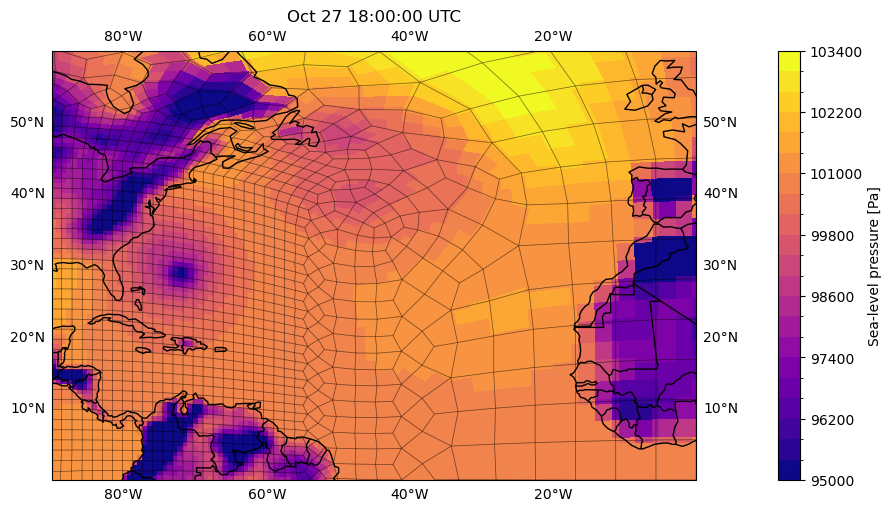

In [7]:
SCRIP_path = "/glade/u/home/nforcone/newmesh1.g"
SCRIP = ux.open_grid(SCRIP_path)
grid_path = "/glade/u/home/nforcone/Sandy_ESMF.nc"

multiple_data_paths = [
    "/glade/derecho/scratch/nforcone/CAM_6_4_025_20240829_FHIST_TEST_2_ne16np4.WEST_ATLANTIC.ne16x2/run/CAM_6_4_025_20240829_FHIST_TEST_2_ne16np4.WEST_ATLANTIC.ne16x2.cam.h0i.2012-10-21-07200.nc",
    "/glade/derecho/scratch/nforcone/CAM_6_4_025_20240829_FHIST_TEST_2_ne16np4.WEST_ATLANTIC.ne16x2/run/CAM_6_4_025_20240829_FHIST_TEST_2_ne16np4.WEST_ATLANTIC.ne16x2.cam.h0i.2012-10-28-50400.nc",
]
uxds_multi = ux.open_mfdataset(
    grid_path, multiple_data_paths, combine="nested", concat_dim="time"
)

time_ind = 80
pc = uxds_multi["PS"][time_ind].to_polycollection()
lc = SCRIP.to_linecollection(colors="black", linewidths=0.5, alpha=0.3)

MyCmap = mpl.cm.plasma
bounds = np.arange(95000, 103500, step=400)
normBounded = mpl.colors.BoundaryNorm(bounds, MyCmap.N)
normObj = mpl.colors.Normalize(vmin=95000, vmax=103572.6)
SM = cm.ScalarMappable(norm=normBounded, cmap=MyCmap)

# disables grid lines
pc.set_antialiased(False)

pc.set_cmap(MyCmap)
pc.set_norm(normBounded)

MyProj = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1,
    1,
    figsize=(10, 5),
    facecolor="w",
    constrained_layout=True,
    subplot_kw=dict(projection=MyProj),
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_collection(pc)
ax.add_collection(lc)

west_extent = -90
east_extent = 0
south_extent = 0
north_extent = 60
ax.set_extent([west_extent, east_extent, south_extent, north_extent], crs=MyProj)
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
plt.title(f'{uxds_multi.time[time_ind].values.item().strftime("%b %d %H:%M:%S")} UTC')
fig.colorbar(SM, ax=ax, label="Sea-level pressure [Pa]")
plt.savefig("/glade/u/home/nforcone/SandyRepo/static_with_grid.png", dpi=350)

In [8]:
uxds_multi.time[0].values.item().strftime("%Y-%m-%d %H:%M:%S")

'2012-10-21 02:00:00'